In [13]:
import vizseq
from vizseq.ipynb import fairseq_viz as fs
from vizseq.custom import distinct_n as distn
%matplotlib inline

In [14]:
# see available scores
vizseq.available_scorers()

# set generation output log file
log_path = '/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100src_rg/nbest5.txt'
# log_path = '/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100src/nbest5.txt'

Available scorers: bert_score, bleu, bp, chrf, cider, gleu, laser, meteor, nist, ribes, rouge_1, rouge_2, rouge_l, ter, wer, wer_del, wer_ins, wer_sub


# Custom scoring function: Distinct-N

In [15]:
s, r, h = fs._get_data(log_path, nbest=1)

In [16]:
# print(len(h['nbest5']))
print(list(h.keys())[0])
print(len(r['0']))
print(r['0'][0])

nbest5
21132
Grüezi " <NAME> " besten Dank für ihren kürzlichen Aufenthalt bei uns - schade , dass sie diesen in so schlechter Erinnerung haben . sie haben bei uns ein Duplex Zimmer gebucht ( und bezogen ) , was ein grosszügiges , zweistöckiges Zimmer im " Elements " ist . beim Check-In haben sie uns versichert , dass alles in bester Ordnung sei und auf die Begleitung einer Réceptionistin aufs Zimmer verzichtet . hat dies evtl. zu Missverständnissen geführt ? das seerose Resort & Spa ist ein ausgesprochen beliebter Ort , um Hochzeiten zu feiern . wir bedauern sehr , dass sie durch die Musik am Schlafen gehindert wurden und hätten ihnen gerne Alternativen angeboten , hätten wir davon Kenntnis gehabt . da wir höchsten Wert auf Freundlichkeit , Authentizität und Professionalität legen , nehmen alle unsere Mitarbeitenden regelmässig an verschiedenen Schulungen teil , mit dem erklärten Ziel , eine offene , transparente und lösungsorientierte Kommunikation mit dem Gast führen zu können . wir

In [17]:
h['nbest5'][0]

'<GREETING> , vielen Dank , dass sie sich die Zeit genommen haben , uns ihre Meinung zu ihrem Aufenthalt bei uns mitzuteilen . wir freuen uns , dass ihnen der Aufenthalt bei uns gefallen hat und hoffen , sie bald wieder bei uns begrüßen zu dürfen ! <SALUTATION>'

In [19]:
print(f"CORPUS DISTINCT 1: {distn.get_corpus_distinct(h['nbest5'], 1)}")
# print(f"SENTENCE AVERAGE DISTINCT 1: {distn.calc_sentence_distinct_average(h['nbest5'], 1)}")

print(f"CORPUS DISTINCT 2: {distn.get_corpus_distinct(h['nbest5'], 2)}")
# print(f"SENTENCE AVERAGE DISTINCT 2: {distn.calc_sentence_distinct_average(h['nbest5'], 2)}")


CORPUS DISTINCT 1: 0.027594829754552536
CORPUS DISTINCT 2: 0.06291814875254116


In [20]:
print(f"REF CORPUS DISTINCT 1: {distn.get_corpus_distinct(r['0'], 1)}")
# print(f"REF SENTENCE AVERAGE DISTINCT 1: {distn.calc_sentence_distinct_average(r['0'], 1)}")

print(f"REF CORPUS DISTINCT 2: {distn.get_corpus_distinct(r['0'], 2)}")
# print(f"REF SENTENCE AVERAGE DISTINCT 2: {distn.calc_sentence_distinct_average(r['0'], 2)}")


REF CORPUS DISTINCT 1: 2.5186372065973175
REF CORPUS DISTINCT 2: 16.900777753252864


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


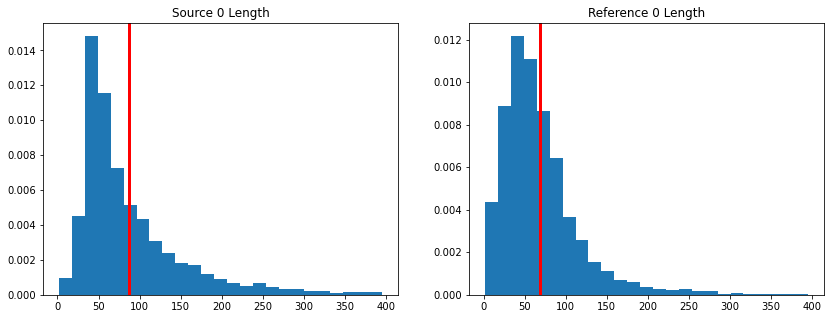

In [15]:
# data set stats
fs.view_stats(log_path)

In [8]:
# NOTE: if using bert_score, set `!CUDA_VISIBLE_DEVICES='N'` first to specify the Nth GPU,
# otherwise GPU 0 will be taken

# !CUDA_VISIBLE_DEVICES=1

# fs.view_examples(log_path, metrics=['bleu', 'rouge_1', 'rouge_2', 'rouge_l', 'bert_score'], query='', page_sz=10, page_no=1, need_g_translate=False, disable_alignment=True)




/home/user/kew/anaconda3/envs/fairseq_gpu/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1321: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


In [10]:
# !CUDA_VISIBLE_DEVICES=1

# fs.view_scores(log_path, ['bleu', 'rouge_1', 'rouge_2', 'rouge_l', 'bert_score'])
fs.view_scores(log_path, ['bleu', 'rouge_2'])

CSV LaTeX,nbest5
All,5.465
CSV LaTeX,nbest5
All,0.137


In [11]:
# source-side n-grams

# vizseq.view_n_grams(src, k=10)

fs.view_n_grams(log_path)

1-gram,Count
.,108318
",",74195
und,55775
das,36328
die,35259
der,29803
sehr,29344
ist,23774
---sep---,20434
in,20379


# 'Custom' visualisations


In [16]:
from vizseq.ipynb.core import view_examples, view_stats, view_n_grams, view_scores
from vizseq._view import DEFAULT_PAGE_SIZE, DEFAULT_PAGE_NO, VizSeqSortingType

,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,439,191","8,519,315"
Reference nbest5,Text,"21,132","818,994","4,410,003"


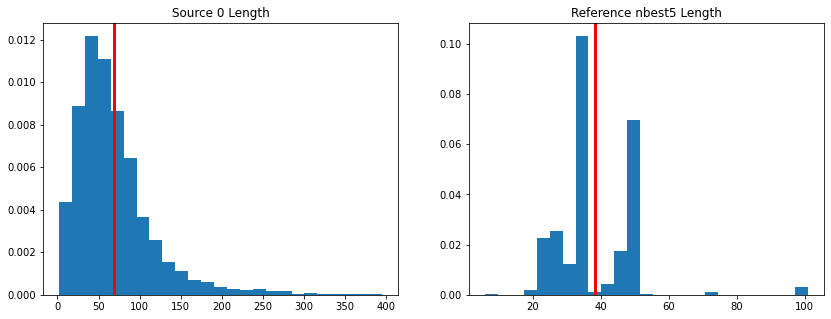

In [17]:
# compare reference lengths with hypothesis lengths

view_stats(r, h)